<h1 align='center'>Computer Vision Project(Single Image Super Resolution With Convolution Neural Network)</center>

# Md. Kamrul Hasan 
Yujie

# Load library 

In [1]:
from keras.datasets import mnist
from keras.layers import Reshape,Dense
import numpy as np
from keras.layers import UpSampling2D,MaxPool2D,Conv2D,Activation,Dropout,BatchNormalization,Conv2DTranspose
from keras.models import Sequential,load_model
import matplotlib.pyplot as plt
from scipy.misc import imresize
from scipy import ndimage as nd
import myplot
from skimage.measure import compare_psnr,compare_ssim
from tqdm import tqdm_notebook as tqdm
from keras.preprocessing.image import ImageDataGenerator
from skimage.color import ycbcr2rgb,rgb2ycbcr
from skimage.measure import compare_psnr,compare_ssim
from scipy.misc import imread
from os import listdir
# from skimage.color import rgb2 
import os

Using TensorFlow backend.


# Load data 

In [2]:

HR_images = np.load('./Train/HR1.npy')
#LR_images = down['LR']
LR_images = np.load('./Train/LR1.npy')
LR_images=LR_images.astype('uint8')
HR_images=HR_images.astype('uint8')
print("High Resoltuion image shape: ",HR_images.shape)
print("Low Resoltuion image shape:  ",LR_images.shape)

#h_r_folder_name = 'image-dataset/h_r'
#l_r_folder_name = 'image-dataset/l_r'
#h_r_files_list = os.listdir(h_r_folder_name)
#l_r_files_list = os.listdir(l_r_folder_name)
#h_r_files_list = [h_r_folder_name+'/'+ x for x in h_r_files_list]
#l_r_files_list = [l_r_folder_name+'/'+ x for x in l_r_files_list]

High Resoltuion image shape:  (100, 320, 480, 3)
Low Resoltuion image shape:   (100, 80, 120, 3)


# Visualise HR and LR in RBG

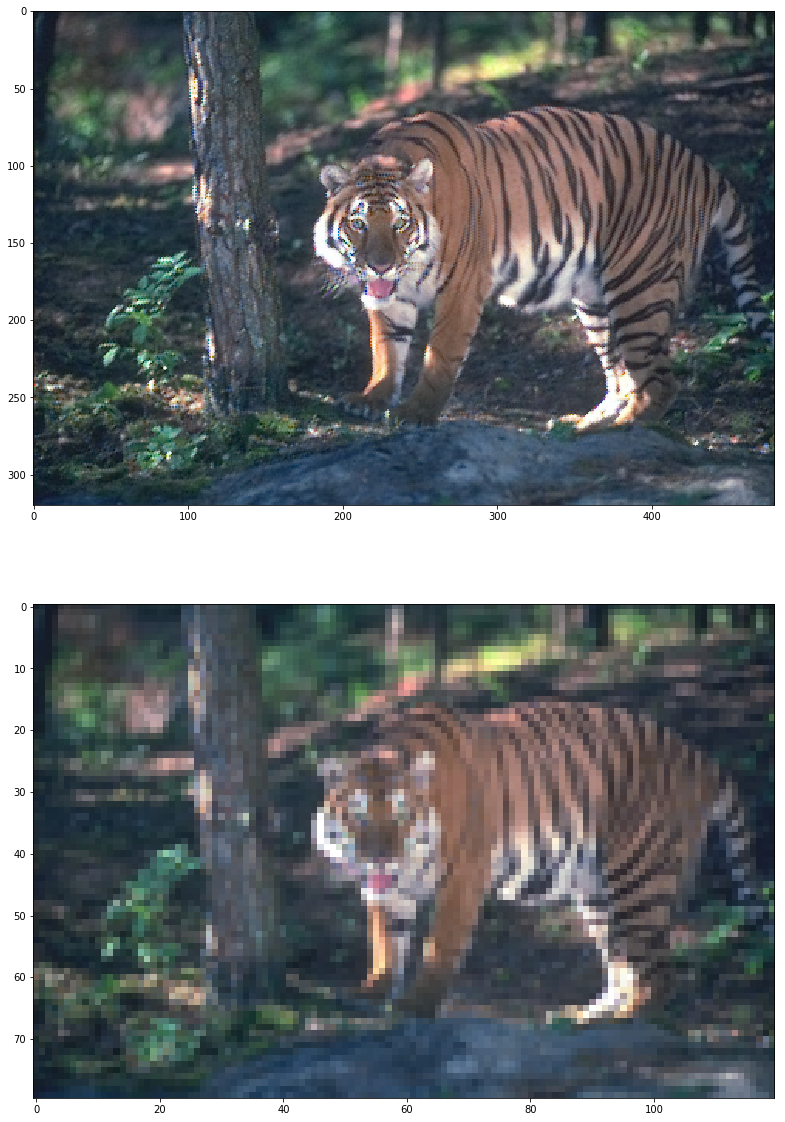

In [3]:
plt.figure(figsize=(30,20))
plt.subplot(211)
plt.imshow((HR_images[6]))
plt.subplot(212)
plt.imshow((LR_images[6]))
plt.show()

In [4]:
#Original_image = np.reshape(LR_images,(LR_images.shape[0],LR_images.shape[1],LR_images.shape[2],1))
print ('shape of original image is %d x %d  x%d  x%d ' %HR_images.shape)
#LR_mnist = np.reshape(LR_mnist,(LR_mnist.shape[0],LR_mnist.shape[1],LR_mnist.shape[2],1))
print ('shape of downsample image is  %d x %d  x%d  x%d  ' %LR_images.shape )

shape of original image is 100 x 320  x480  x3 
shape of downsample image is  100 x 80  x120  x3  


# Bicubic interplation 

In [5]:
from skimage.transform import  resize
temp_bicubic= []
for index in tqdm(range(len(LR_images))):
    temp_bicubic.append(imresize(LR_images[index],size=4.0,interp='bicubic'))
bicubic_LR =np.array(temp_bicubic)
bicubic_LR.shape

C:\Users\hasan\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


(100, 320, 480, 3)

# The input is the bicubic-low-resolution image , the output is the original image

Here is the model architecturee for SISRIA

In [7]:
R=Sequential()
R.add(Conv2D(64,(9,9),padding='same',input_shape = (None,None,1)))
R.add(Activation('relu')) 
R.add(Conv2D(32,(1,1),padding='same'))
R.add(Activation('relu'))
R.add(Conv2D(1,(5,5),padding='same'))
R.compile(loss='mse',optimizer='adam')
his_R = R.fit(x=bicubic_LR[:,:,:,0:1],y=HR_images[:,:,:,0:1],batch_size=4,epochs=100,verbose=1)

#####G####
G=Sequential()
G.add(Conv2D(64,(9,9),padding='same',input_shape = (None,None,1)))
G.add(Activation('relu')) 
G.add(Conv2D(32,(1,1),padding='same'))
G.add(Activation('relu'))
G.add(Conv2D(1,(5,5),padding='same'))
G.compile(loss='mse',optimizer='adam')
his_G = G.fit(x=bicubic_LR[:,:,:,1:2],y=HR_images[:,:,:,1:2],batch_size=4,epochs=100,verbose=1)


###B#####
B=Sequential()
B.add(Conv2D(64,(9,9),padding='same',input_shape = (None,None,1)))
B.add(Activation('relu')) 
B.add(Conv2D(32,(1,1),padding='same'))
B.add(Activation('relu'))
B.add(Conv2D(1,(5,5),padding='same'))
B.compile(loss='mse',optimizer='adam')
his_B = B.fit(x=bicubic_LR[:,:,:,2:3],y=HR_images[:,:,:,2:3],batch_size=4,epochs=100,verbose=1)

Epoch 1/100
100/100 [==============================] - ETA: 1:47 - loss: 8759.12 - ETA: 1:29 - loss: 5639.82 - ETA: 1:22 - loss: 3892.54 - ETA: 1:16 - loss: 3506.45 - ETA: 1:11 - loss: 3185.28 - ETA: 1:07 - loss: 2837.68 - ETA: 1:03 - loss: 2510.32 - ETA: 1:00 - loss: 2289.70 - ETA: 57s - loss: 2164.1382 - ETA: 54s - loss: 2050.902 - ETA: 50s - loss: 1897.161 - ETA: 46s - loss: 1768.280 - ETA: 43s - loss: 1672.051 - ETA: 39s - loss: 1623.241 - ETA: 35s - loss: 1560.896 - ETA: 32s - loss: 1497.695 - ETA: 28s - loss: 1448.510 - ETA: 24s - loss: 1402.116 - ETA: 21s - loss: 1357.813 - ETA: 17s - loss: 1318.756 - ETA: 14s - loss: 1272.592 - ETA: 10s - loss: 1237.858 - ETA: 6s - loss: 1198.246 - ETA: 3s - loss: 1164.29 - 86s 863ms/step - loss: 1136.8005
Epoch 2/100
100/100 [==============================] - ETA: 1:17 - loss: 446.980 - ETA: 1:14 - loss: 447.266 - ETA: 1:10 - loss: 460.027 - ETA: 1:07 - loss: 429.005 - ETA: 1:04 - loss: 403.415 - ETA: 1:00 - loss: 420.459 - ETA: 57s - loss: 45

100/100 [==============================] - ETA: 1:17 - loss: 290.721 - ETA: 1:15 - loss: 394.727 - ETA: 1:11 - loss: 333.550 - ETA: 1:08 - loss: 296.210 - ETA: 1:06 - loss: 268.874 - ETA: 1:02 - loss: 272.028 - ETA: 59s - loss: 260.026 - ETA: 55s - loss: 244.66 - ETA: 52s - loss: 233.91 - ETA: 49s - loss: 227.75 - ETA: 46s - loss: 218.45 - ETA: 43s - loss: 226.51 - ETA: 39s - loss: 218.17 - ETA: 36s - loss: 218.74 - ETA: 33s - loss: 233.26 - ETA: 29s - loss: 229.75 - ETA: 26s - loss: 227.68 - ETA: 23s - loss: 224.28 - ETA: 19s - loss: 218.85 - ETA: 16s - loss: 216.03 - ETA: 13s - loss: 210.79 - ETA: 9s - loss: 212.8429 - ETA: 6s - loss: 207.906 - ETA: 3s - loss: 206.623 - 83s 827ms/step - loss: 203.5569
Epoch 24/100
100/100 [==============================] - ETA: 1:20 - loss: 216.091 - ETA: 1:15 - loss: 238.449 - ETA: 1:12 - loss: 204.636 - ETA: 1:08 - loss: 191.825 - ETA: 1:06 - loss: 185.891 - ETA: 1:03 - loss: 193.182 - ETA: 1:00 - loss: 207.615 - ETA: 57s - loss: 202.935 - ETA: 53s

100/100 [==============================] - ETA: 1:24 - loss: 263.759 - ETA: 1:21 - loss: 278.189 - ETA: 1:17 - loss: 286.110 - ETA: 1:14 - loss: 235.988 - ETA: 1:09 - loss: 229.782 - ETA: 1:06 - loss: 211.194 - ETA: 1:02 - loss: 217.058 - ETA: 59s - loss: 222.912 - ETA: 56s - loss: 209.44 - ETA: 52s - loss: 208.63 - ETA: 49s - loss: 203.54 - ETA: 45s - loss: 194.20 - ETA: 42s - loss: 189.57 - ETA: 38s - loss: 189.38 - ETA: 35s - loss: 191.23 - ETA: 31s - loss: 198.19 - ETA: 28s - loss: 201.00 - ETA: 24s - loss: 201.59 - ETA: 21s - loss: 207.34 - ETA: 17s - loss: 202.68 - ETA: 14s - loss: 198.72 - ETA: 10s - loss: 200.48 - ETA: 7s - loss: 200.2773 - ETA: 3s - loss: 198.169 - 89s 888ms/step - loss: 199.4071
Epoch 46/100
100/100 [==============================] - ETA: 1:33 - loss: 244.402 - ETA: 1:24 - loss: 247.012 - ETA: 1:19 - loss: 229.367 - ETA: 1:15 - loss: 217.742 - ETA: 1:12 - loss: 201.775 - ETA: 1:07 - loss: 192.267 - ETA: 1:04 - loss: 199.038 - ETA: 1:01 - loss: 199.513 - ETA: 

100/100 [==============================] - ETA: 1:16 - loss: 95.91 - ETA: 1:12 - loss: 121.873 - ETA: 1:09 - loss: 137.065 - ETA: 1:07 - loss: 126.796 - ETA: 1:03 - loss: 162.742 - ETA: 1:00 - loss: 165.448 - ETA: 57s - loss: 166.158 - ETA: 55s - loss: 165.45 - ETA: 52s - loss: 183.28 - ETA: 49s - loss: 196.32 - ETA: 46s - loss: 190.94 - ETA: 42s - loss: 197.37 - ETA: 39s - loss: 202.18 - ETA: 36s - loss: 200.03 - ETA: 32s - loss: 202.87 - ETA: 29s - loss: 203.55 - ETA: 26s - loss: 198.93 - ETA: 23s - loss: 199.04 - ETA: 19s - loss: 202.05 - ETA: 16s - loss: 198.06 - ETA: 13s - loss: 198.06 - ETA: 9s - loss: 195.5542 - ETA: 6s - loss: 192.563 - ETA: 3s - loss: 195.098 - 83s 829ms/step - loss: 197.8350
Epoch 68/100
100/100 [==============================] - ETA: 1:23 - loss: 192.128 - ETA: 1:20 - loss: 240.065 - ETA: 1:15 - loss: 247.153 - ETA: 1:11 - loss: 301.501 - ETA: 1:07 - loss: 274.932 - ETA: 1:04 - loss: 248.836 - ETA: 1:01 - loss: 231.341 - ETA: 57s - loss: 245.427 - ETA: 54s -

100/100 [==============================] - ETA: 1:25 - loss: 92.36 - ETA: 1:24 - loss: 178.831 - ETA: 1:20 - loss: 235.558 - ETA: 1:17 - loss: 217.811 - ETA: 1:13 - loss: 228.642 - ETA: 1:10 - loss: 215.549 - ETA: 1:06 - loss: 219.170 - ETA: 1:02 - loss: 215.225 - ETA: 58s - loss: 201.611 - ETA: 55s - loss: 195.75 - ETA: 51s - loss: 195.01 - ETA: 47s - loss: 188.95 - ETA: 43s - loss: 187.52 - ETA: 39s - loss: 190.73 - ETA: 35s - loss: 194.16 - ETA: 31s - loss: 192.02 - ETA: 28s - loss: 197.09 - ETA: 24s - loss: 193.62 - ETA: 21s - loss: 189.91 - ETA: 17s - loss: 186.76 - ETA: 14s - loss: 181.90 - ETA: 10s - loss: 180.78 - ETA: 7s - loss: 183.1471 - ETA: 3s - loss: 187.746 - 88s 877ms/step - loss: 194.8166
Epoch 90/100
100/100 [==============================] - ETA: 1:32 - loss: 148.321 - ETA: 1:27 - loss: 158.291 - ETA: 1:21 - loss: 153.516 - ETA: 1:17 - loss: 144.221 - ETA: 1:14 - loss: 160.451 - ETA: 1:09 - loss: 168.766 - ETA: 1:05 - loss: 163.539 - ETA: 1:01 - loss: 162.537 - ETA: 

100/100 [==============================] - ETA: 1:16 - loss: 259.652 - ETA: 1:14 - loss: 206.657 - ETA: 1:11 - loss: 235.443 - ETA: 1:08 - loss: 230.280 - ETA: 1:04 - loss: 214.008 - ETA: 1:01 - loss: 224.784 - ETA: 58s - loss: 224.524 - ETA: 55s - loss: 249.61 - ETA: 52s - loss: 250.81 - ETA: 49s - loss: 250.46 - ETA: 45s - loss: 249.85 - ETA: 42s - loss: 242.80 - ETA: 39s - loss: 230.75 - ETA: 36s - loss: 230.97 - ETA: 32s - loss: 225.58 - ETA: 29s - loss: 225.73 - ETA: 26s - loss: 224.57 - ETA: 22s - loss: 227.48 - ETA: 19s - loss: 221.88 - ETA: 16s - loss: 220.81 - ETA: 13s - loss: 221.07 - ETA: 9s - loss: 220.3421 - ETA: 6s - loss: 227.470 - ETA: 3s - loss: 227.445 - 82s 817ms/step - loss: 226.0408
Epoch 12/100
100/100 [==============================] - ETA: 1:18 - loss: 297.596 - ETA: 1:15 - loss: 253.861 - ETA: 1:11 - loss: 296.250 - ETA: 1:08 - loss: 268.772 - ETA: 1:05 - loss: 256.214 - ETA: 1:02 - loss: 242.266 - ETA: 59s - loss: 244.552 - ETA: 56s - loss: 240.23 - ETA: 52s -

100/100 [==============================] - ETA: 1:16 - loss: 204.381 - ETA: 1:16 - loss: 244.931 - ETA: 1:11 - loss: 253.196 - ETA: 1:08 - loss: 222.055 - ETA: 1:05 - loss: 198.176 - ETA: 1:01 - loss: 213.469 - ETA: 58s - loss: 209.486 - ETA: 55s - loss: 205.13 - ETA: 52s - loss: 197.03 - ETA: 49s - loss: 186.60 - ETA: 45s - loss: 201.03 - ETA: 42s - loss: 203.31 - ETA: 39s - loss: 203.91 - ETA: 35s - loss: 202.12 - ETA: 32s - loss: 204.23 - ETA: 29s - loss: 209.65 - ETA: 26s - loss: 209.90 - ETA: 22s - loss: 205.80 - ETA: 19s - loss: 207.02 - ETA: 16s - loss: 205.70 - ETA: 13s - loss: 202.60 - ETA: 9s - loss: 204.8145 - ETA: 6s - loss: 202.948 - ETA: 3s - loss: 201.123 - 82s 820ms/step - loss: 200.2227
Epoch 34/100
100/100 [==============================] - ETA: 1:20 - loss: 189.023 - ETA: 1:15 - loss: 188.688 - ETA: 1:12 - loss: 177.565 - ETA: 1:08 - loss: 165.396 - ETA: 1:05 - loss: 165.041 - ETA: 1:02 - loss: 166.028 - ETA: 59s - loss: 165.473 - ETA: 55s - loss: 169.75 - ETA: 52s -

100/100 [==============================] - ETA: 1:16 - loss: 149.394 - ETA: 1:15 - loss: 187.820 - ETA: 1:12 - loss: 198.904 - ETA: 1:09 - loss: 178.773 - ETA: 1:05 - loss: 181.550 - ETA: 1:02 - loss: 177.388 - ETA: 58s - loss: 186.695 - ETA: 55s - loss: 189.23 - ETA: 52s - loss: 209.88 - ETA: 49s - loss: 214.44 - ETA: 45s - loss: 218.75 - ETA: 42s - loss: 217.55 - ETA: 39s - loss: 216.86 - ETA: 35s - loss: 211.49 - ETA: 32s - loss: 210.63 - ETA: 29s - loss: 205.75 - ETA: 26s - loss: 204.03 - ETA: 22s - loss: 202.91 - ETA: 19s - loss: 206.24 - ETA: 16s - loss: 204.80 - ETA: 13s - loss: 207.49 - ETA: 9s - loss: 206.8704 - ETA: 6s - loss: 204.156 - ETA: 3s - loss: 201.881 - 82s 818ms/step - loss: 200.7504
Epoch 56/100
100/100 [==============================] - ETA: 1:15 - loss: 194.859 - ETA: 1:12 - loss: 186.913 - ETA: 1:10 - loss: 222.708 - ETA: 1:08 - loss: 203.410 - ETA: 1:05 - loss: 189.301 - ETA: 1:02 - loss: 188.711 - ETA: 58s - loss: 190.421 - ETA: 55s - loss: 203.88 - ETA: 52s -

100/100 [==============================] - ETA: 1:18 - loss: 201.671 - ETA: 1:14 - loss: 215.868 - ETA: 1:13 - loss: 222.693 - ETA: 1:09 - loss: 192.692 - ETA: 1:06 - loss: 188.642 - ETA: 1:03 - loss: 179.337 - ETA: 59s - loss: 196.146 - ETA: 56s - loss: 203.44 - ETA: 52s - loss: 203.10 - ETA: 49s - loss: 196.85 - ETA: 45s - loss: 203.01 - ETA: 42s - loss: 202.67 - ETA: 39s - loss: 198.21 - ETA: 36s - loss: 208.00 - ETA: 32s - loss: 205.99 - ETA: 29s - loss: 203.31 - ETA: 26s - loss: 199.46 - ETA: 23s - loss: 198.19 - ETA: 19s - loss: 204.95 - ETA: 16s - loss: 200.79 - ETA: 13s - loss: 197.70 - ETA: 9s - loss: 198.4876 - ETA: 6s - loss: 198.332 - ETA: 3s - loss: 194.593 - 82s 822ms/step - loss: 193.4007
Epoch 78/100
100/100 [==============================] - ETA: 1:26 - loss: 182.825 - ETA: 1:19 - loss: 287.067 - ETA: 1:13 - loss: 255.172 - ETA: 1:09 - loss: 212.186 - ETA: 1:06 - loss: 216.905 - ETA: 1:02 - loss: 215.662 - ETA: 59s - loss: 203.954 - ETA: 55s - loss: 209.90 - ETA: 52s -

100/100 [==============================] - ETA: 1:20 - loss: 282.326 - ETA: 1:16 - loss: 254.097 - ETA: 1:14 - loss: 285.605 - ETA: 1:10 - loss: 253.266 - ETA: 1:07 - loss: 248.252 - ETA: 1:03 - loss: 233.235 - ETA: 1:00 - loss: 215.247 - ETA: 56s - loss: 206.851 - ETA: 53s - loss: 197.20 - ETA: 50s - loss: 196.32 - ETA: 46s - loss: 192.51 - ETA: 43s - loss: 195.76 - ETA: 39s - loss: 196.03 - ETA: 36s - loss: 191.31 - ETA: 33s - loss: 191.05 - ETA: 29s - loss: 193.80 - ETA: 26s - loss: 195.54 - ETA: 23s - loss: 202.15 - ETA: 19s - loss: 201.88 - ETA: 16s - loss: 198.85 - ETA: 13s - loss: 201.12 - ETA: 9s - loss: 196.7936 - ETA: 6s - loss: 194.452 - ETA: 3s - loss: 194.861 - 83s 826ms/step - loss: 191.5149
Epoch 100/100
100/100 [==============================] - ETA: 1:17 - loss: 60.28 - ETA: 1:13 - loss: 131.246 - ETA: 1:09 - loss: 169.182 - ETA: 1:07 - loss: 151.390 - ETA: 1:04 - loss: 149.328 - ETA: 1:01 - loss: 193.873 - ETA: 58s - loss: 174.809 - ETA: 54s - loss: 190.37 - ETA: 51s 

100/100 [==============================] - ETA: 1:20 - loss: 342.106 - ETA: 1:16 - loss: 310.083 - ETA: 1:13 - loss: 317.316 - ETA: 1:11 - loss: 338.569 - ETA: 1:07 - loss: 308.974 - ETA: 1:04 - loss: 286.910 - ETA: 1:00 - loss: 277.653 - ETA: 56s - loss: 275.596 - ETA: 53s - loss: 258.23 - ETA: 50s - loss: 247.02 - ETA: 46s - loss: 257.08 - ETA: 43s - loss: 261.06 - ETA: 39s - loss: 256.21 - ETA: 36s - loss: 254.14 - ETA: 33s - loss: 253.83 - ETA: 29s - loss: 267.53 - ETA: 26s - loss: 264.34 - ETA: 23s - loss: 261.04 - ETA: 19s - loss: 255.16 - ETA: 16s - loss: 263.63 - ETA: 13s - loss: 261.71 - ETA: 9s - loss: 259.5518 - ETA: 6s - loss: 258.229 - ETA: 3s - loss: 255.796 - 82s 825ms/step - loss: 252.7082
Epoch 22/100
100/100 [==============================] - ETA: 1:16 - loss: 156.985 - ETA: 1:14 - loss: 229.010 - ETA: 1:12 - loss: 263.761 - ETA: 1:09 - loss: 246.942 - ETA: 1:05 - loss: 245.950 - ETA: 1:02 - loss: 262.407 - ETA: 59s - loss: 242.293 - ETA: 55s - loss: 246.14 - ETA: 53s

100/100 [==============================] - ETA: 1:22 - loss: 197.106 - ETA: 1:16 - loss: 219.404 - ETA: 1:12 - loss: 202.835 - ETA: 1:08 - loss: 185.436 - ETA: 1:05 - loss: 218.235 - ETA: 1:01 - loss: 223.386 - ETA: 58s - loss: 221.736 - ETA: 55s - loss: 202.12 - ETA: 52s - loss: 213.48 - ETA: 49s - loss: 208.68 - ETA: 45s - loss: 199.22 - ETA: 42s - loss: 208.99 - ETA: 39s - loss: 210.38 - ETA: 36s - loss: 207.36 - ETA: 32s - loss: 220.71 - ETA: 29s - loss: 216.88 - ETA: 26s - loss: 214.95 - ETA: 22s - loss: 219.44 - ETA: 19s - loss: 217.04 - ETA: 16s - loss: 212.90 - ETA: 13s - loss: 214.05 - ETA: 9s - loss: 217.3822 - ETA: 6s - loss: 218.752 - ETA: 3s - loss: 223.374 - 82s 819ms/step - loss: 220.4899
Epoch 44/100
100/100 [==============================] - ETA: 1:18 - loss: 280.937 - ETA: 1:16 - loss: 300.707 - ETA: 1:12 - loss: 277.366 - ETA: 1:08 - loss: 247.387 - ETA: 1:05 - loss: 230.772 - ETA: 1:02 - loss: 259.366 - ETA: 59s - loss: 275.739 - ETA: 55s - loss: 292.22 - ETA: 52s -

100/100 [==============================] - ETA: 1:16 - loss: 195.572 - ETA: 1:16 - loss: 274.824 - ETA: 1:13 - loss: 248.815 - ETA: 1:09 - loss: 218.077 - ETA: 1:07 - loss: 213.775 - ETA: 1:03 - loss: 218.223 - ETA: 1:00 - loss: 223.843 - ETA: 56s - loss: 213.940 - ETA: 52s - loss: 206.06 - ETA: 49s - loss: 194.84 - ETA: 46s - loss: 198.35 - ETA: 42s - loss: 203.30 - ETA: 39s - loss: 204.16 - ETA: 36s - loss: 203.77 - ETA: 32s - loss: 200.62 - ETA: 29s - loss: 199.72 - ETA: 26s - loss: 201.97 - ETA: 22s - loss: 214.35 - ETA: 19s - loss: 225.39 - ETA: 16s - loss: 223.29 - ETA: 13s - loss: 218.60 - ETA: 9s - loss: 219.0927 - ETA: 6s - loss: 214.508 - ETA: 3s - loss: 220.429 - 82s 819ms/step - loss: 217.8218
Epoch 66/100
100/100 [==============================] - ETA: 1:18 - loss: 197.909 - ETA: 1:15 - loss: 167.128 - ETA: 1:12 - loss: 179.667 - ETA: 1:09 - loss: 155.736 - ETA: 1:06 - loss: 153.614 - ETA: 1:02 - loss: 184.687 - ETA: 59s - loss: 185.339 - ETA: 55s - loss: 185.41 - ETA: 52s

100/100 [==============================] - ETA: 1:17 - loss: 432.261 - ETA: 1:14 - loss: 325.650 - ETA: 1:11 - loss: 251.009 - ETA: 1:07 - loss: 245.430 - ETA: 1:04 - loss: 234.866 - ETA: 1:01 - loss: 217.195 - ETA: 58s - loss: 201.407 - ETA: 54s - loss: 201.29 - ETA: 51s - loss: 213.50 - ETA: 48s - loss: 216.31 - ETA: 45s - loss: 216.39 - ETA: 42s - loss: 223.63 - ETA: 38s - loss: 214.75 - ETA: 35s - loss: 210.71 - ETA: 32s - loss: 207.25 - ETA: 29s - loss: 204.81 - ETA: 25s - loss: 198.10 - ETA: 22s - loss: 204.17 - ETA: 19s - loss: 205.41 - ETA: 16s - loss: 208.63 - ETA: 13s - loss: 207.46 - ETA: 9s - loss: 203.3849 - ETA: 6s - loss: 212.971 - ETA: 3s - loss: 218.902 - 81s 814ms/step - loss: 216.2498
Epoch 88/100
100/100 [==============================] - ETA: 1:18 - loss: 101.493 - ETA: 1:14 - loss: 178.062 - ETA: 1:11 - loss: 194.095 - ETA: 1:08 - loss: 179.587 - ETA: 1:04 - loss: 158.516 - ETA: 1:02 - loss: 168.294 - ETA: 58s - loss: 164.583 - ETA: 55s - loss: 171.59 - ETA: 52s -

Epoch 1/50
100/100 [==============================] - ETA: 1:26 - loss: 10021.357 - ETA: 1:19 - loss: 9677.105 - ETA: 1:14 - loss: 7165.42 - ETA: 1:10 - loss: 5549.21 - ETA: 1:07 - loss: 5045.49 - ETA: 1:03 - loss: 4671.56 - ETA: 59s - loss: 4343.1223 - ETA: 56s - loss: 3854.823 - ETA: 53s - loss: 3489.093 - ETA: 50s - loss: 3202.840 - ETA: 46s - loss: 2983.374 - ETA: 43s - loss: 2845.452 - ETA: 39s - loss: 2792.347 - ETA: 36s - loss: 2665.284 - ETA: 33s - loss: 2526.028 - ETA: 29s - loss: 2402.562 - ETA: 26s - loss: 2302.102 - ETA: 23s - loss: 2209.800 - ETA: 19s - loss: 2156.955 - ETA: 16s - loss: 2090.517 - ETA: 13s - loss: 2025.156 - ETA: 9s - loss: 1946.448 - ETA: 6s - loss: 1878.34 - ETA: 3s - loss: 1818.33 - 83s 827ms/step - loss: 1772.3186
Epoch 2/50
100/100 [==============================] - ETA: 1:18 - loss: 367.790 - ETA: 1:15 - loss: 496.196 - ETA: 1:12 - loss: 503.743 - ETA: 1:09 - loss: 493.634 - ETA: 1:06 - loss: 465.053 - ETA: 1:03 - loss: 476.295 - ETA: 59s - loss: 489

100/100 [==============================] - ETA: 1:18 - loss: 246.927 - ETA: 1:15 - loss: 220.600 - ETA: 1:12 - loss: 256.815 - ETA: 1:09 - loss: 255.303 - ETA: 1:05 - loss: 234.438 - ETA: 1:02 - loss: 222.845 - ETA: 59s - loss: 212.483 - ETA: 55s - loss: 207.79 - ETA: 52s - loss: 204.96 - ETA: 49s - loss: 207.73 - ETA: 45s - loss: 216.72 - ETA: 42s - loss: 209.36 - ETA: 39s - loss: 208.12 - ETA: 36s - loss: 207.64 - ETA: 32s - loss: 205.95 - ETA: 29s - loss: 204.72 - ETA: 26s - loss: 203.48 - ETA: 22s - loss: 198.87 - ETA: 19s - loss: 205.20 - ETA: 16s - loss: 202.35 - ETA: 13s - loss: 199.08 - ETA: 9s - loss: 200.1210 - ETA: 6s - loss: 198.533 - ETA: 3s - loss: 201.645 - 82s 816ms/step - loss: 198.5432
Epoch 24/50
100/100 [==============================] - ETA: 1:19 - loss: 103.145 - ETA: 1:15 - loss: 136.288 - ETA: 1:12 - loss: 119.825 - ETA: 1:09 - loss: 135.822 - ETA: 1:05 - loss: 146.636 - ETA: 1:02 - loss: 164.357 - ETA: 58s - loss: 169.059 - ETA: 55s - loss: 172.44 - ETA: 52s - 

100/100 [==============================] - ETA: 1:15 - loss: 160.249 - ETA: 1:13 - loss: 181.034 - ETA: 1:10 - loss: 180.987 - ETA: 1:07 - loss: 207.530 - ETA: 1:05 - loss: 207.230 - ETA: 1:01 - loss: 211.599 - ETA: 58s - loss: 223.897 - ETA: 55s - loss: 212.86 - ETA: 52s - loss: 213.35 - ETA: 48s - loss: 219.35 - ETA: 45s - loss: 230.48 - ETA: 42s - loss: 222.58 - ETA: 39s - loss: 222.99 - ETA: 35s - loss: 219.37 - ETA: 32s - loss: 210.71 - ETA: 29s - loss: 205.65 - ETA: 26s - loss: 200.73 - ETA: 22s - loss: 194.88 - ETA: 19s - loss: 195.42 - ETA: 16s - loss: 189.67 - ETA: 13s - loss: 186.23 - ETA: 9s - loss: 187.4161 - ETA: 6s - loss: 196.141 - ETA: 3s - loss: 196.412 - 81s 815ms/step - loss: 193.5867
Epoch 46/50
100/100 [==============================] - ETA: 1:17 - loss: 186.960 - ETA: 1:13 - loss: 202.406 - ETA: 1:10 - loss: 184.301 - ETA: 1:07 - loss: 219.046 - ETA: 1:04 - loss: 200.193 - ETA: 1:01 - loss: 194.275 - ETA: 57s - loss: 188.667 - ETA: 54s - loss: 201.29 - ETA: 51s - 

Epoch 1/50
100/100 [==============================] - ETA: 1:32 - loss: 30448.613 - ETA: 1:21 - loss: 20334.522 - ETA: 1:16 - loss: 14084.064 - ETA: 1:11 - loss: 10703.562 - ETA: 1:07 - loss: 8938.532 - ETA: 1:03 - loss: 8104.26 - ETA: 1:00 - loss: 7207.48 - ETA: 56s - loss: 6385.6883 - ETA: 52s - loss: 5772.551 - ETA: 49s - loss: 5249.768 - ETA: 46s - loss: 4836.644 - ETA: 42s - loss: 4498.556 - ETA: 39s - loss: 4229.440 - ETA: 36s - loss: 3991.177 - ETA: 32s - loss: 3775.817 - ETA: 29s - loss: 3596.117 - ETA: 26s - loss: 3408.015 - ETA: 22s - loss: 3240.552 - ETA: 19s - loss: 3083.291 - ETA: 16s - loss: 2954.286 - ETA: 13s - loss: 2849.501 - ETA: 9s - loss: 2752.747 - ETA: 6s - loss: 2659.92 - ETA: 3s - loss: 2573.82 - 82s 817ms/step - loss: 2496.9455
Epoch 2/50
100/100 [==============================] - ETA: 1:15 - loss: 599.803 - ETA: 1:12 - loss: 505.232 - ETA: 1:10 - loss: 449.719 - ETA: 1:07 - loss: 461.162 - ETA: 1:04 - loss: 481.293 - ETA: 1:01 - loss: 480.804 - ETA: 57s - los

100/100 [==============================] - ETA: 1:24 - loss: 217.385 - ETA: 1:20 - loss: 236.481 - ETA: 1:20 - loss: 219.853 - ETA: 1:17 - loss: 280.195 - ETA: 1:14 - loss: 250.981 - ETA: 1:11 - loss: 242.789 - ETA: 1:08 - loss: 234.282 - ETA: 1:04 - loss: 234.677 - ETA: 1:00 - loss: 248.061 - ETA: 56s - loss: 245.919 - ETA: 53s - loss: 244.90 - ETA: 48s - loss: 238.08 - ETA: 44s - loss: 244.77 - ETA: 40s - loss: 245.73 - ETA: 36s - loss: 246.34 - ETA: 33s - loss: 247.92 - ETA: 29s - loss: 245.89 - ETA: 25s - loss: 239.98 - ETA: 21s - loss: 240.03 - ETA: 17s - loss: 235.30 - ETA: 14s - loss: 231.37 - ETA: 10s - loss: 225.04 - ETA: 7s - loss: 220.5813 - ETA: 3s - loss: 230.317 - 89s 887ms/step - loss: 231.2111
Epoch 24/50
100/100 [==============================] - ETA: 1:25 - loss: 132.684 - ETA: 1:18 - loss: 187.905 - ETA: 1:14 - loss: 195.232 - ETA: 1:10 - loss: 209.327 - ETA: 1:07 - loss: 203.221 - ETA: 1:03 - loss: 205.512 - ETA: 1:00 - loss: 200.511 - ETA: 56s - loss: 202.499 - ETA

100/100 [==============================] - ETA: 1:17 - loss: 122.300 - ETA: 1:17 - loss: 157.134 - ETA: 1:13 - loss: 145.939 - ETA: 1:10 - loss: 170.586 - ETA: 1:06 - loss: 174.222 - ETA: 1:03 - loss: 171.254 - ETA: 59s - loss: 197.451 - ETA: 56s - loss: 196.54 - ETA: 52s - loss: 182.03 - ETA: 49s - loss: 185.48 - ETA: 45s - loss: 188.44 - ETA: 42s - loss: 188.71 - ETA: 39s - loss: 182.51 - ETA: 36s - loss: 188.11 - ETA: 32s - loss: 188.08 - ETA: 29s - loss: 197.07 - ETA: 26s - loss: 202.89 - ETA: 22s - loss: 207.72 - ETA: 19s - loss: 204.15 - ETA: 16s - loss: 213.14 - ETA: 13s - loss: 213.75 - ETA: 9s - loss: 213.0372 - ETA: 6s - loss: 212.265 - ETA: 3s - loss: 216.723 - 82s 820ms/step - loss: 219.2896
Epoch 46/50
100/100 [==============================] - ETA: 1:18 - loss: 248.744 - ETA: 1:14 - loss: 193.403 - ETA: 1:11 - loss: 230.608 - ETA: 1:08 - loss: 254.608 - ETA: 1:05 - loss: 249.810 - ETA: 1:01 - loss: 242.718 - ETA: 58s - loss: 223.935 - ETA: 55s - loss: 226.49 - ETA: 52s - 

In [27]:
R.save('SISRIA_HR_CE.R.h5')
G.save('SISRIA_HR_CE.G.h5')
B.save('SISRIA_HR_CE.B.h5')

# Predict 

In [29]:
R=load_model('SISRIA_HR_CE.R.h5')
G=load_model('SISRIA_HR_CE.G.h5')
B=load_model('SISRIA_HR_CE.B.h5')

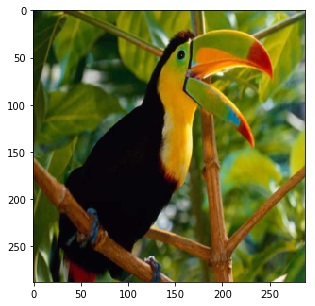

In [30]:
import imageio
mypath = './Test/Set5/image_SRF_4/img_002_SRF_4_HR.png'
value_truth= imageio.imread(mypath)
plt.figure(figsize=(10,5))
plt.imshow(value_truth)

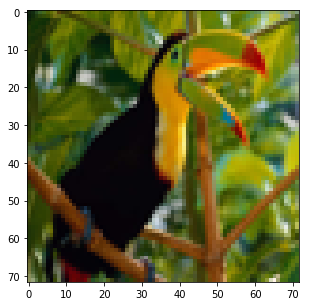

In [31]:
mypath = './Test/Set5/image_SRF_4/img_002_SRF_4_LR.png'
value_pred=imageio.imread(mypath)
plt.figure(figsize=(10,5))
plt.imshow(value_pred)

In [32]:
value_pred_bi=imresize(arr=value_pred,size=4.0,interp='bicubic')
#value_pred=(value_pred-127.5)/128
value_pred=np.reshape(value_pred,(1,value_pred.shape[0],value_pred.shape[1],value_pred.shape[2]))
value_pred_bi = np.reshape(value_pred_bi,(1,value_pred_bi.shape[0],value_pred_bi.shape[1],value_pred_bi.shape[2]))


C:\Users\hasan\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


In [33]:
value_pred_bi.shape
value_pred.shape


(1, 72, 72, 3)

In [34]:
predict_SR=value_pred_bi.copy()
Rc= R.predict(value_pred_bi[:,:,:,0:1])
Gc= G.predict(value_pred_bi[:,:,:,1:2])
Bc = B.predict(value_pred_bi[:,:,:,2:3])


In [35]:
#predict_SR= G.predict(x=value_pred)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


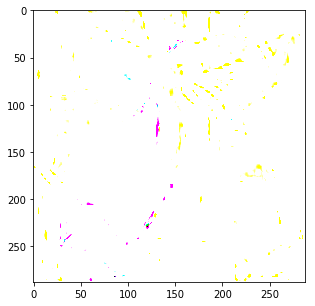

In [36]:
predict_SR=np.zeros((288,288,3))
predict_SR[:,:,0:1] = Rc
predict_SR[:,:,1:2] = Gc
predict_SR[:,:,2:3] = Bc

plt.figure(figsize=(10,5))
plt.imshow(predict_SR)

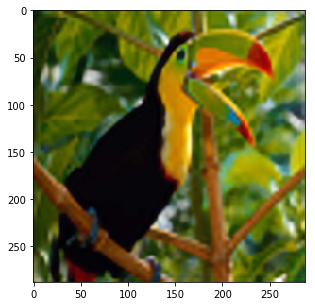

In [37]:
#predict_SR=predict_SR*128+127.5
predict_SR[predict_SR>255]=255
predict_SR[predict_SR<0]=0
predict_SR=predict_SR.astype('uint8')
predict_SR.shape
plt.figure(figsize=(10,5))
plt.imshow(predict_SR)

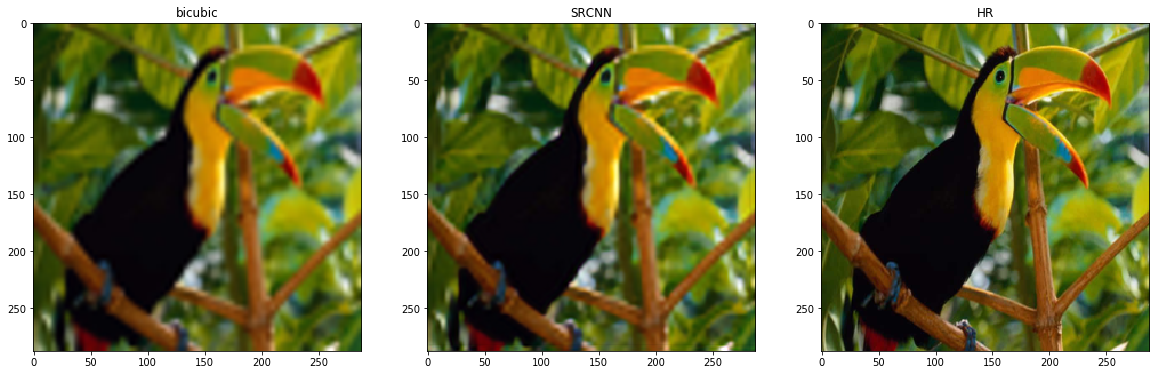

In [38]:
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.title('bicubic')
plt.imshow(value_pred_bi[0].astype('uint8'))
plt.subplot(132)

plt.title('SRCNN')

plt.imshow(predict_SR.astype('uint8'))
plt.subplot(133)

plt.title('HR')

plt.imshow(value_truth.astype('uint8'))

#plt.savefig('SET5_SRF4_02')
plt.show()

<h1 align = 'center' =>Measure PSNR </center>

In [39]:
compare_psnr(im_true=value_truth,im_test=predict_SR)

29.014257347651025

In [40]:
compare_psnr(im_true=value_truth,im_test=value_pred_bi[0])

28.081496026867683

# Stand alone function

In [41]:
def super_resolution(img): 
    img=imresize(arr=img,size=4.0,interp='bicubic')
    predict_SR=np.zeros(img.shape)
    img =np.reshape(img,(1,img.shape[0],img.shape[1],3))
    predict_SR[:,:,0:1] = R.predict(img[:,:,:,0:1])
    predict_SR[:,:,1:2] = G.predict(img[:,:,:,1:2])
    predict_SR[:,:,2:3] = B.predict(img[:,:,:,2:3])
    predict_SR[predict_SR>255]=255
    predict_SR[predict_SR<0]=0
    predict_SR=predict_SR.astype('uint8')
    return predict_SR,img[0]

In [42]:
img.shape

(86, 57, 3)

In [43]:
def funcplot(value_pred_bi,predict_SR,value_truth,name):
    plt.figure(figsize=(16,8))
    plt.subplot(131)
    plt.xticks([])
    plt.yticks([])
    plt.title('bicubic')
    plt.imshow(value_pred_bi.astype('uint8'))
    plt.subplot(132)

    plt.xticks([])
    plt.yticks([])
    plt.title('SRCNN')

    plt.imshow(predict_SR.astype('uint8'))
    plt.subplot(133)

    plt.xticks([])
    plt.yticks([])
    plt.title('HR')

    plt.imshow(value_truth.astype('uint8'))

    plt.savefig('./'+name)
    plt.show()

In [44]:
value_truth.shape

(288, 288, 3)

C:\Users\hasan\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
C:\Users\hasan\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
C:\Users\hasan\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


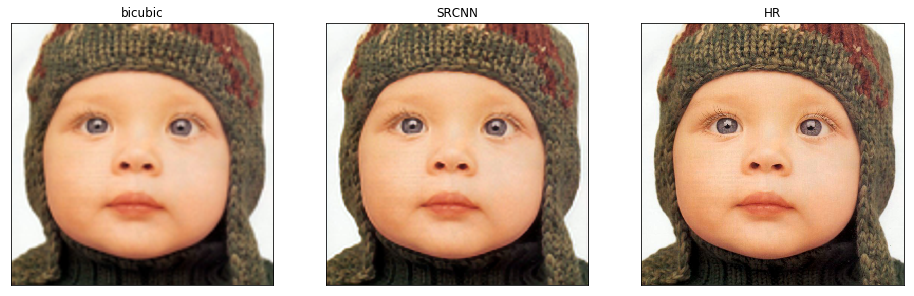

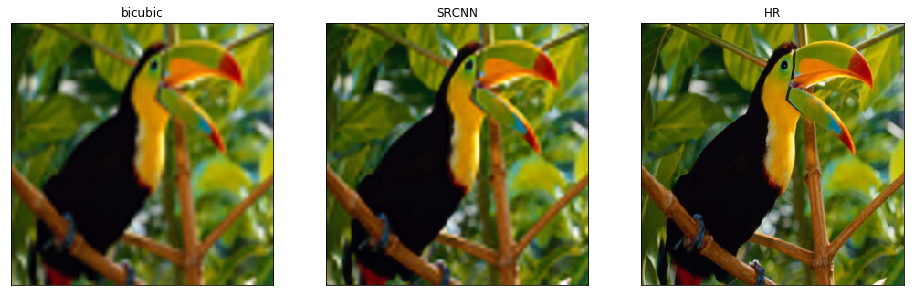

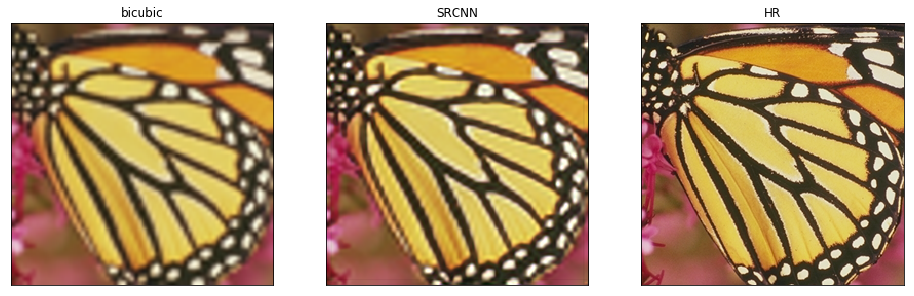

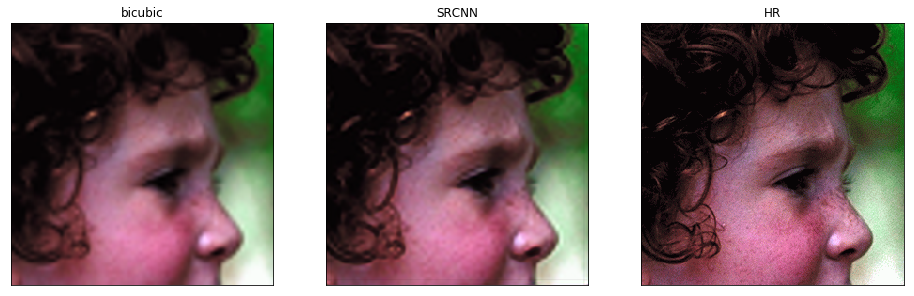

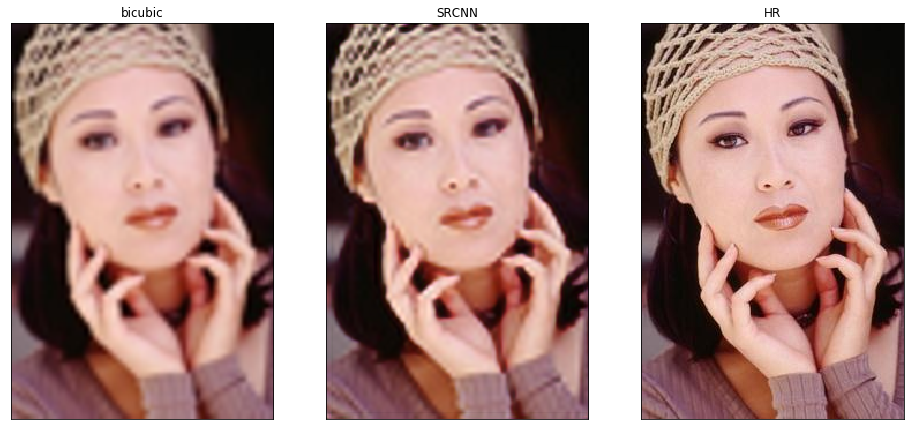

[31.02377082 29.01425735 22.09386273 29.21650387 25.89025022]
[30.42055422 28.08149603 20.90605214 28.96556363 25.11345838]


In [45]:
path = './Test/Set5/image_SRF_4/'
psrn_o =[]
psrn_n =[]
for files in listdir(path):
    if 'LR' in files:
        img = imread(path+files)
        SR ,value_pred_bi= super_resolution(img)
        files= files.replace('L','H')
        value_truth= imread(path+files)
        psrn_o.append(compare_psnr(im_true=value_truth,im_test=SR))
        psrn_n.append(compare_psnr(im_true=value_truth,im_test=value_pred_bi))
        funcplot(value_pred_bi,SR,value_truth,files)
psrn_o = np.array(psrn_o)
psrn_n = np.array(psrn_n)
print (str(psrn_o) +'\n' + str(psrn_n) )
